### Prosta przykładowa analiza danych zescrapowanych ze strony transfermarkt

#### Dane to statystyki piłkarzy z pola grających w top 5 lig w Europie w aktualnym sezonie 2022/23

Problemy napotkane podczas scrapowania wraz z opisem rozwiązania: 
1. Strona ma wiele nieregularności w prezentacji danych. Część piłkarzy miała wpisane dwa kraje pochodzenia, inni zaś nie mięli określonej wartości rynkowej i tym podobne.
Jak sobie z tym podziłem? Okazało się, że na stronie istnieje kilka tabelek ze szczegółami piłkarza, więc wystarczyło znaleźć jak najbardziej ujednoliconą wersję. Nie rozwiązało to problemu całkowicie i trzeba było zastosować obsługę wyjątków podczas parsowania kodu html, by odrzucić przypadki powodujące błędy. Zdecydowałem się na odrzucenie w ten sposób części danych, jednakże zrobiłem to ze świadomością, że takie dane nie przydałyby mi się, ponieważ byłyby niekompletne i zawirałyby mnóstwo missing values. 

2. Bramkarze mają inny zestaw statysk, dlatego zdecydowałem się na analizę tylko graczy z pola.

3. Czyszczenie danych.   
Po przejrzeniu danych okazało się, że mój zestaw zawiera kilka błędów. Ze względu na niewielki rozmiar danych (około 2tys rekordów) mogłem pozwolić sobie na poprawki za pomocą notatnika. W przypadku bardziej skomplikowanych błędów i wiekszych danych należałoby skorzystać z pythona i odpowiednio dopasowanych wyrażeń regularnych.

W moim przypadku czyszczenie było proste ponieważ:
- w kilku miejscach występował znak "-" zamiast "0" i zależało to zmienić zwykłą funcją "zamień" w notatniku,
- mój program nie zamienił wszytkich "tys." na "000", zatem to również należało już w notatniku poprawić. Ponowne uruchomienie scrapowania zajęłoby zbyt dużo czasu.
- kilku piłkarzy miało wspisany fragment html, który parsowałem zamiast wartości. Poprawiłem to ręcznie, ponieważ takich przypadków było około 10 i co ciekawe byli to głównie polscy zawodnicy.

średni wzrost piłkarza: 1.821019693654274


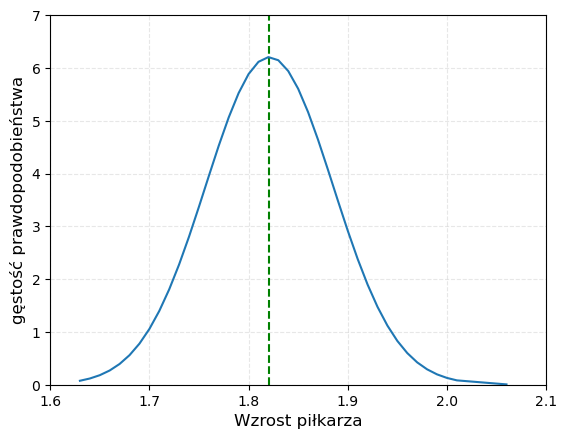

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv('PlayersDataCorrect.txt', sep=";", header=None)
data.columns = ["Name", "Value", "Age", "Height", "Position", "Country", 
                "Club", "Appearances", "Goals", "Assists", "Yellows", "RedYellows", "Reds", "Minutes"]

# Calculating mean and Stdev of Height
data_mean = np.mean(data["Height"])
data_std = np.std(data["Height"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(data["Height"].sort_values(), data_mean, data_std)

plt.vlines(data_mean, ymin=0, ymax=7, linestyle='--', colors='g', label='wartość średnia')

# Drawing a graph
plt.plot(data["Height"].sort_values(), pdf)
plt.xlim([1.6, 2.1])  
plt.ylim([0, 7])
plt.xlabel("Wzrost piłkarza", size=12)    
plt.ylabel("gęstość prawdopodobieństwa", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

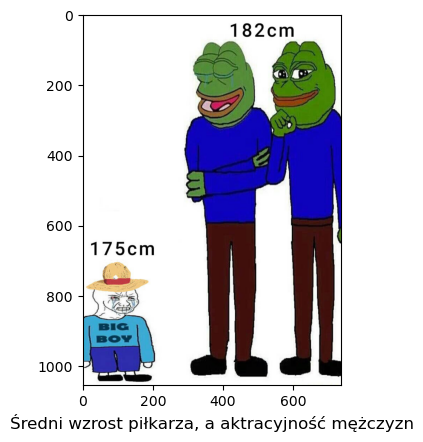

średni wzrost piłkarza: 1.82 m


In [26]:
img = plt.imread('sources/wzrost_mem.jpg')
plt.imshow(img)
plt.xlabel("Średni wzrost piłkarza, a aktracyjność mężczyzn", size=12)   
plt.show()
print("średni wzrost piłkarza: {:.2f} m".format(data_mean) )


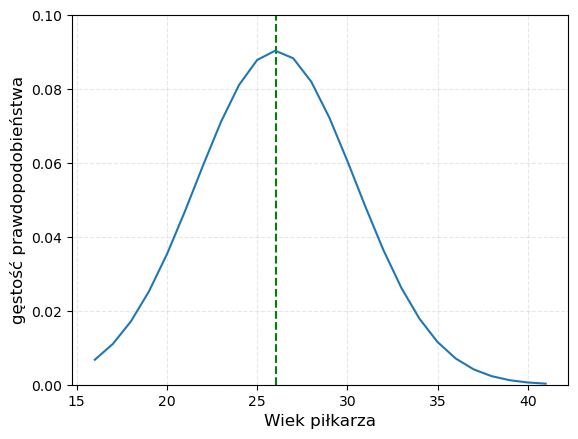

In [32]:
# Calculating mean and Stdev of Age
data_mean = np.mean(data["Age"])
data_std = np.std(data["Age"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(data["Age"].sort_values(), data_mean, data_std)

plt.vlines(data_mean, ymin=0, ymax=7, linestyle='--', colors='g', label='wartość średnia')

# Drawing a graph
plt.plot(data["Age"].sort_values(), pdf)
#plt.xlim([1.6, 2.1])  
plt.ylim([0, 0.1])
plt.xlabel("Wiek piłkarza", size=12)    
plt.ylabel("gęstość prawdopodobieństwa", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [35]:
print("średni wiek piłkarza: {:.0f} lat".format(data_mean) )


średni wiek piłkarza: 26 lat


In [39]:
from scipy.stats import skew
skewness = skew(pdf)
print(skewness)

-0.648468010365809


Otrzymaliśmy skośność ujmną, która informuje nas o skupieniu obserwacji statystycznych przy wartościach większych od średniej. Co potwierdza wizualną ocenę wykresu. 